<a href="https://colab.research.google.com/github/genachiasson/PowerShell/blob/master/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.copy_on_write = True
# Due to warnings near graphing, this had to be set to True.

In [3]:
url = "https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.json"

response = requests.get(url)
data = response.text
parsed = json.loads(data)

formatted_data = []
for row in parsed['data']:
  if len(row) >= 16:
    column_names = [col['name'] for col in parsed['meta']['view']['columns'][8:24]]
    formatted_data.append(dict(zip(column_names, row[8:24])))

# Create the Pandas DataFrame from the formatted data.
df_sm = pd.DataFrame(formatted_data)

# Display the first few rows of the DataFrame.
df_sm.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409,Southeast Queens,2015,2015-01-01T00:00:00,0.3,None
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209,Bensonhurst - Bay Ridge,2015,2015-01-01T00:00:00,1.2,None
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01T00:00:00,8.6,None
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Annual Average 2012,2011-12-01T00:00:00,8.0,None
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409,Southeast Queens,Summer 2022,2022-06-01T00:00:00,6.1,None


In [4]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique ID       18025 non-null  object
 1   Indicator ID    18025 non-null  object
 2   Name            18025 non-null  object
 3   Measure         18025 non-null  object
 4   Measure Info    18025 non-null  object
 5   Geo Type Name   18025 non-null  object
 6   Geo Join ID     18016 non-null  object
 7   Geo Place Name  18016 non-null  object
 8   Time Period     18025 non-null  object
 9   Start_Date      18025 non-null  object
 10  Data Value      18025 non-null  object
 11  Message         0 non-null      object
dtypes: object(12)
memory usage: 1.7+ MB


Notable Details:

Data indicates that there is 18025 rows and 12 columns.

A. Explain why this dataset was chosen:

  This dataset was chosen to identify the airquality in NYC location and how diffirent particles and emissions impact those areas. Measurement occur for specified time periods and could potentially offer a comparitive analysis of air quality between locations in highly populated areas.
  Dataset contains information on New York City air quality surveillance data.

  "Air pollution is one of the most important environmental threats to urban populations and while all people are exposed, pollutant emissions, levels of exposure, and population vulnerability vary across neighborhoods. Exposures to common air pollutants have been linked to respiratory and cardiovascular diseases, cancers, and premature deaths. These indicators provide a perspective across time and NYC geographies to better characterize air quality and health in NYC. Data can also be explored online at the Environment and Health Data Portal: http://nyc.gov/health/environmentdata."

B. Develop three business questions you could potentially answer using this dataset and hypothesize what the answer to those questions might be within the context of the dataset:

    1.	Which area displays a greater density of poor air quality?

    2.	Is there any correlation between pollutants within certain locations?

    3.	Can any anomalies be identified?
    

Find more information on environmental pollutants, here:
https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm





Types of Air pollutants measured:

1. Boiler Emissions- Total SO2 Emissions
2. Fine particles (PM 2.5)
3. Nitrogen dioxide (NO2)
4. Asthma emergency department visits due to PM2.5
5. Annual vehicle miles traveled
6. Respiratory hospitalizations due to PM2.5 (age 20+)
7. Ozone (O3)
8. Asthma hospitalizations due to Ozone
9. Boiler Emissions- Total NOx Emissions
10. Boiler Emissions- Total PM2.5 Emissions
11. Outdoor Air Toxics - Formaldehyde
12. Asthma emergency departments visits due to Ozone
13. Cardiovascular hospitalizations due to PM2.5 (age 40+)
14. Cardiac and respiratory deaths due to Ozone
15. Deaths due to PM2.5
16. Outdoor Air Toxics - Benzene
17. Annual vehicle miles traveled (trucks)
18. Annual vehicle miles traveled (cars)

In [5]:
selected_data = df_sm.loc[2:5, ['Unique ID', 'Name', 'Data Value']]
print(selected_data)

  Unique ID                     Name Data Value
2    178540  Fine particles (PM 2.5)        8.6
3    178561  Fine particles (PM 2.5)        8.0
4    823217  Fine particles (PM 2.5)        6.1
5    177910  Fine particles (PM 2.5)       10.0


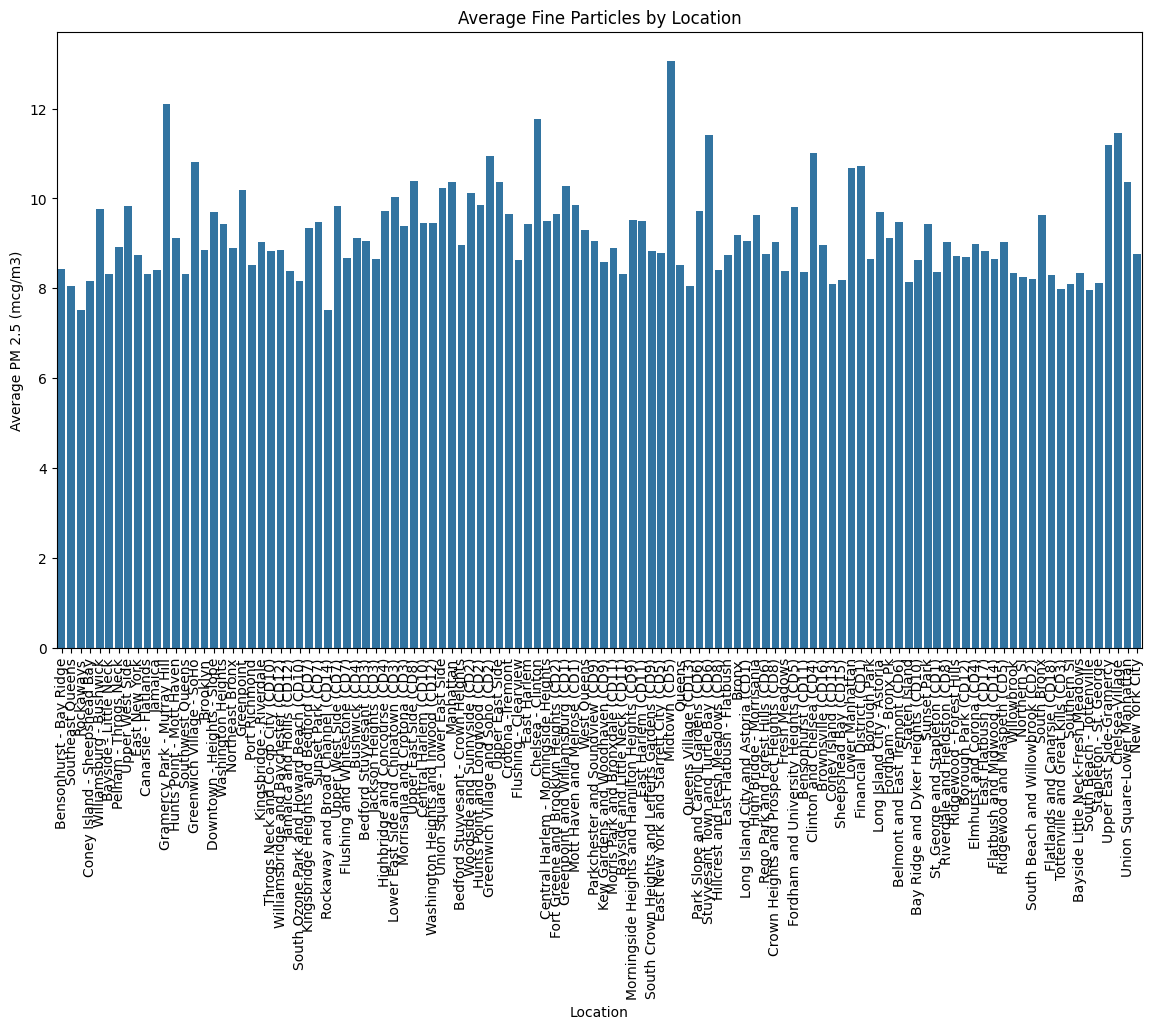

In [7]:
# Filter the dataset for Fine particles (PM 2.5)
pm25_data = df_sm[df_sm['Name'] == 'Fine particles (PM 2.5)']

# Convert 'Data Value' to numeric
pm25_data['Data Value'] = pd.to_numeric(pm25_data['Data Value'])

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Geo Place Name', y='Data Value', data=pm25_data, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Fine Particles by Location')
plt.xlabel('Location')
plt.ylabel('Average PM 2.5 (mcg/m3)')
plt.show()

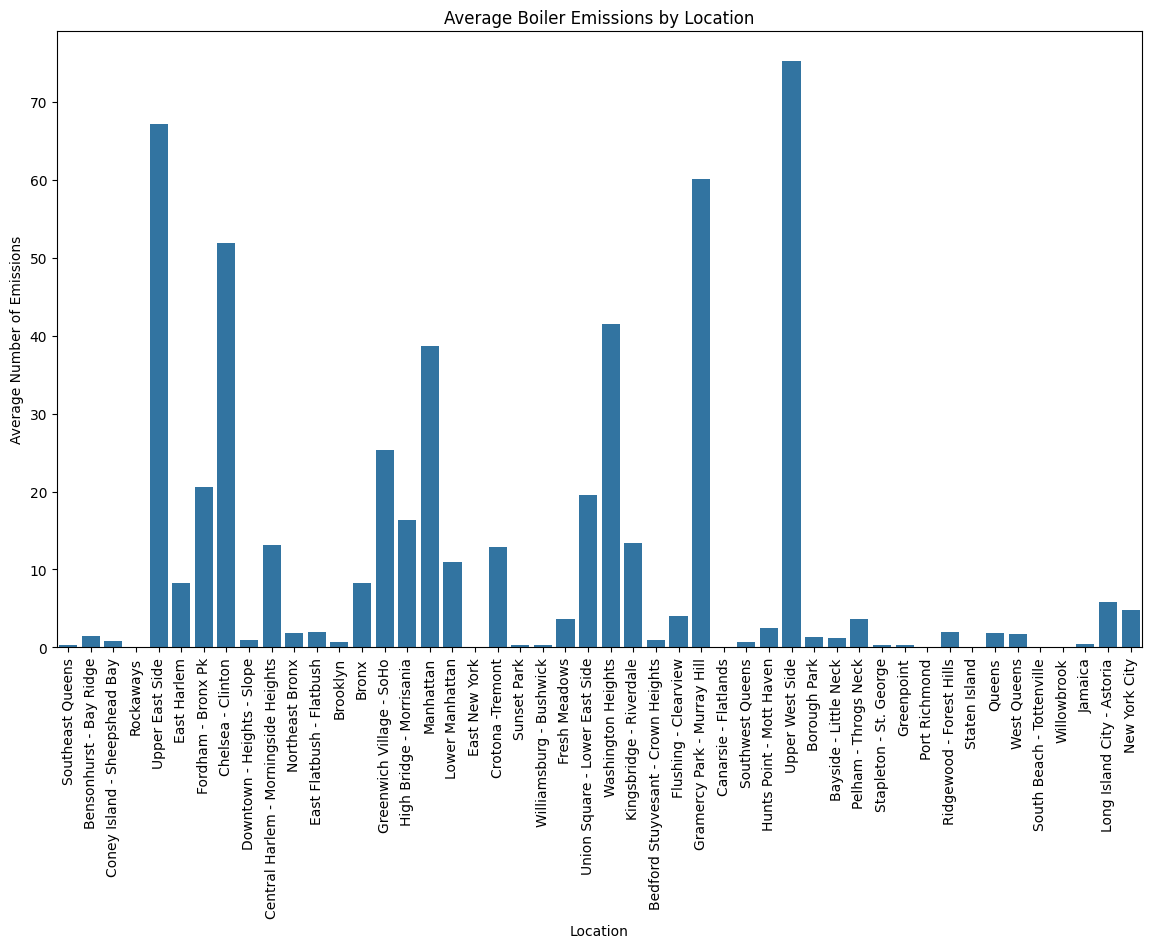

In [6]:
# Filter the dataset for Fine particles (PM 2.5)
pm25_data = df_sm[df_sm['Name'] == 'Boiler Emissions- Total SO2 Emissions']

# Convert 'Data Value' to numeric
pm25_data['Data Value'] = pd.to_numeric(pm25_data['Data Value'])

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Geo Place Name', y='Data Value', data=pm25_data, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Boiler Emissions by Location')
plt.xlabel('Location')
plt.ylabel('Average Number of Emissions')
plt.show()